In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris,make_blobs,load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,export_graphviz, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import graphviz

import matplotlib.image as mpimg

In [2]:
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
moduleDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

In [3]:
decision_tree = graphviz.Digraph(node_attr={'shape': 'box'}, edge_attr={'labeldistance': '10.5'},format = 'png')

decision_tree.node("0", 'Has Feathers?')
decision_tree.node("1", 'Can Fly?')
decision_tree.node("2",'Has Fins?')
decision_tree.node("3", 'Hawk?')
decision_tree.node("4", 'Penguin')
decision_tree.node("5", 'Doplphin')
decision_tree.node("6", 'Bear')

decision_tree.edge("0", "1", label = "True")
decision_tree.edge("0", "1", label = "False")

decision_tree.edge("0", "1", label = "True")
decision_tree.edge("0", "1", label = "False")

In [4]:
from sklearn.model_selection import train_test_split
data = load_breast_cancer()

X_train, X_test, y_train,y_test = train_test_split(data.data,data.target,test_size=TEST_SIZE,stratify=data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [5]:
tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

tree.fit(X_train, y_train)

y_pred =tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.8947368421052632

In [6]:
y_pred =tree.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [7]:
tree = DecisionTreeClassifier(max_depth=3,random_state=RANDOM_STATE)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)

print ('Train',accuracy_score(y_train, y_pred))

y_pred = tree.predict(X_test)

print('Test',accuracy_score(y_test, y_pred))



Train 0.9824175824175824
Test 0.8859649122807017


In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
export_graphviz(tree, out_file='tree.dot',impurity=False, filled=True,class_names=data.target_names, feature_names=data.feature_names)

In [10]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
img = graphviz.Source(dot_graph)
!dot -Tpng tree.dot -o tree.png

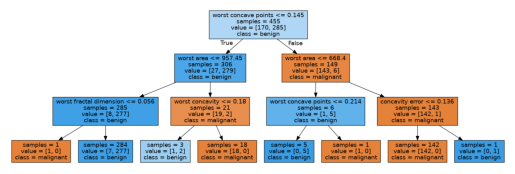

In [11]:
plt.imshow(mpimg.imread('tree.png'))
plt.axis('off');